# Codes for creation (sampling) of the datasets used, as well as their quality check

In [1]:
%%capture
!pip install --upgrade --quiet datasets huggingface_hub fsspec


In [3]:
from huggingface_hub import login
from datasets import load_dataset

login(token=" ")


Test dataset:

In [4]:
%%capture
ds = load_dataset("HuggingFaceH4/ultrachat_200k")

In [ ]:
ds_split = ds['test_sft']
sampled_dataset = ds_split.select(range(100))  #first 100 samples

In [ ]:
sampled_dataset.save_to_disk("HFH4_ultrachat_200k_first100_samples")

Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
for i in range(2):
    print(f"Test sample {i+1}:\n{sampled_dataset[i]}\n")


Test sample 1:
{'prompt': 'How does the author propose to fix the problem of science alienation in our educational system? What changes does she suggest should be made to science education? Answer according to: Science education should be split into two tracks.\nSplit K-12 science education into two tracks, for majors and nonmajors.\nThose who want to specialize in science could take math and complex chemistry. Nonmajors would focus on science of the everyday—things like kitchen chemistry and CSI-style crime investigations.\nSome years ago, when I was working as a newspaper science writer in California, I fell into a rather idle conversation with a physicist on the subject of science education. Idle for him, at least, because what he said—the way he defined the American system of teaching K-12 students about science—has stayed with me since.\nThis conversation has returned to me many times over the years. On the day my older son, who spent his childhood joyfully chasing insects and rea

Pushing to HF

In [ ]:
from datasets import DatasetDict, load_from_disk

#loading saved sample
sampled_dataset = load_from_disk("HFH4_ultrachat_200k_first100_samples")

# # pushing to Hugging Face
# sampled_dataset.push_to_hub("daryna3325/HFH4_ultrachat_200k_first100_samples")


Train dataeset:

In [ ]:
nan_id_cosine = "open_orca_t0.1598436"

In [14]:
%%capture
ds = load_dataset("allenai/tulu-v2-sft-mixture")

Pushing to HF

In [ ]:
ds_train = ds['train']

sampled_dataset = ds_train.shuffle(seed=42).select(range(1000))

sampled_dataset.save_to_disk("sampled_tulu_1000")

#loading saved sample
sampled_dataset = load_from_disk("sampled_tulu_1000")

# # pushing to Hugging Face
# sampled_dataset.push_to_hub("daryna3325/sampled-tulu-1000")


In [ ]:
%%capture
ds = load_dataset("daryna3325/sampled-tulu-1000", split = "train")

In [ ]:
next((len(example['messages'][1]['content']) for i, example in enumerate(ds) if example['id'] == nan_id_cosine), None)


18002

In [ ]:
target_id = "open_orca_t0.1598436"
index = next((i for i, example in enumerate(ds) if example['id'] == target_id), None)

print(f"Index of sample with id {target_id}:", index)

Index of sample with id open_orca_t0.1598436: 570


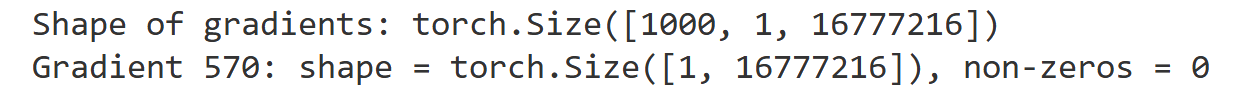

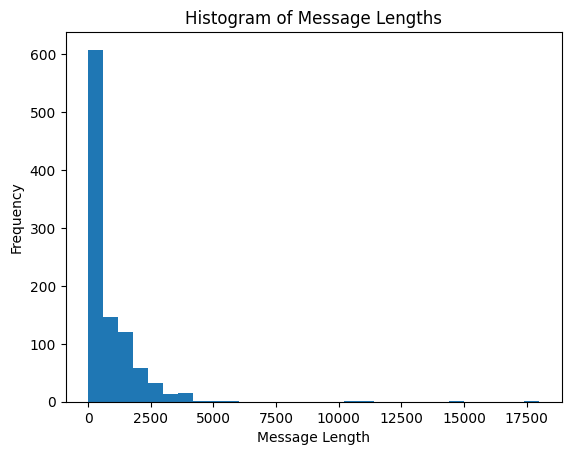

In [ ]:
import matplotlib.pyplot as plt

lengths = [len(example['messages'][1]['content']) for i, example in enumerate(ds)]
plt.hist(lengths, bins=30)
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.title("Histogram of Message Lengths")
plt.show()

In [ ]:
max(len(example['messages'][1]['content']) for i, example in enumerate(ds))


18002